# From [Stack Overflow: Logistic Regression in PyMC](http://stackoverflow.com/questions/25126444/logistic-regression-in-pymc)

In [1]:
import pymc as pm, pandas as pd, seaborn
%matplotlib inline

In [4]:
import io

df = pd.read_csv(io.StringIO("""ID,GotSick,Salad,Sandwich,Water
1,0,0,1,0
2,1,1,0,1
3,0,1,0,0
100,1,1,0,1"""))

In [5]:
x1 = df.Salad
x2 = df.Sandwich
x3 = df.Water

### hyperpriors
tau = pm.Gamma('tau', 1.e-3, 1.e-3, value=10.)
sigma = pm.Lambda('sigma', lambda tau=tau: tau**-.5)

### parameters
# fixed effects
beta0 =  pm.Normal('beta0',  0., 1e-6, value=0.)
betaSalad =  pm.Normal('betaSalad',  0., 1e-6, value=0.) 
betaSandwich =  pm.Normal('betaSandwich',  0., 1e-6, value=0.)
betaWater = pm.Normal('betaWater',  0., 1e-6, value=0.)

# expected parameter
logit_p =  (beta0 + betaSalad*x1 + betaSandwich*x2 + betaWater*x3)


In [6]:
import pymc as pm

@pm.observed
def y(logit_p=logit_p, value=df.GotSick):
    return pm.bernoulli_like(df.GotSick, pm.invlogit(logit_p))

In [7]:
m = pm.MCMC(locals())

In [8]:
m.sample(100000, 50000, 50)

 [-----------------100%-----------------] 100000 of 100000 complete in 141.8 sec

Plotting betaSalad
Plotting betaSandwich
Plotting beta0
Plotting sigma


ValueError: range parameter must be finite.

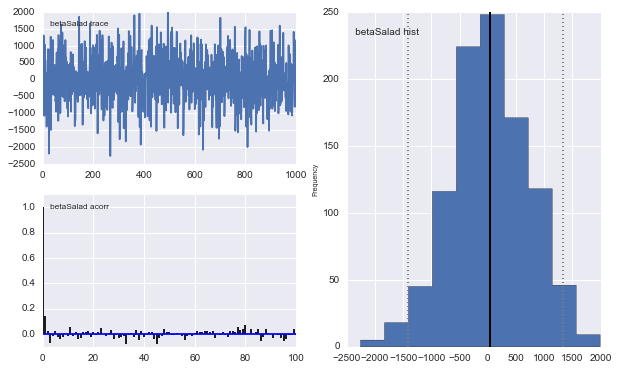

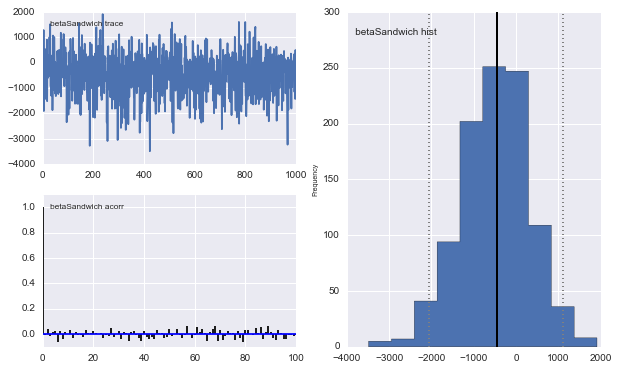

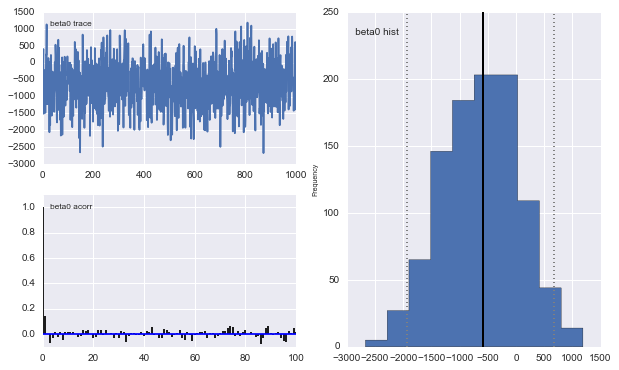

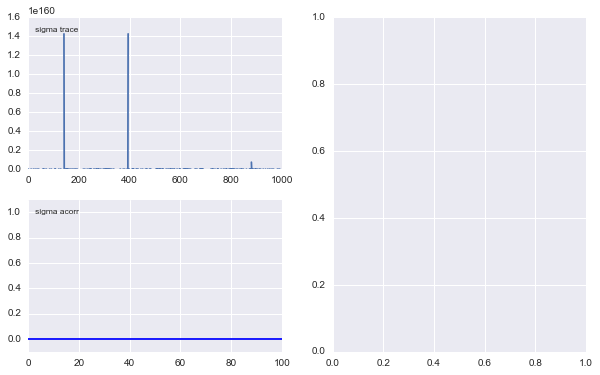

In [10]:
pm.Matplot.plot(m)